In [74]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt

# Data preperation


In [75]:
df = pd.read_csv("agg.csv")
df.head()

number  available  free  total           updated_at  \
0       1          1    24     25  2025-11-12 20:46:00   
1       2          1    14     15  2025-11-12 20:46:00   
2       3          8    11     20  2025-11-12 20:46:00   
3       4          4    19     25  2025-11-12 20:46:00   
4       5          4    11     15  2025-11-12 20:46:00   

                                        address  geo_point_2d.lon  \
0  C/GUILLEM DE CASTRO esquina con C/NA JORDANA         -0.382929   
1                     Salvador Giner - C. Museo         -0.379748   
2               Plaza del Musico López Chavarri         -0.380288   
3                   Plaza de la Virgen - Bailía         -0.375342   
4                          Plaza Poeta Llorente         -0.371140   

   geo_point_2d.lat    weekday  is_weekend  available_to_total_ratio      time  
0         39.480042  Wednesday       False                  0.040000  20:46:00  
1         39.479889  Wednesday       False                  0.066667  20:46:00  
2         39.476835  Wednesday       False                  0.400000  20:46:00  
3         39.476747  Wednesday       False                  0.160000  20:46:00  
4         39.476895  Wednesday       False                  0.266667  20:46:00

In [76]:
df["timestamp"] = pd.to_datetime(df["updated_at"])
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["weekday"] = df["timestamp"].dt.weekday
df["date"] = df["timestamp"].dt.date

In [77]:
df.head()

number  available  free  total           updated_at  \
0       1          1    24     25  2025-11-12 20:46:00   
1       2          1    14     15  2025-11-12 20:46:00   
2       3          8    11     20  2025-11-12 20:46:00   
3       4          4    19     25  2025-11-12 20:46:00   
4       5          4    11     15  2025-11-12 20:46:00   

                                        address  geo_point_2d.lon  \
0  C/GUILLEM DE CASTRO esquina con C/NA JORDANA         -0.382929   
1                     Salvador Giner - C. Museo         -0.379748   
2               Plaza del Musico López Chavarri         -0.380288   
3                   Plaza de la Virgen - Bailía         -0.375342   
4                          Plaza Poeta Llorente         -0.371140   

   geo_point_2d.lat  weekday  is_weekend  available_to_total_ratio      time  \
0         39.480042        2       False                  0.040000  20:46:00   
1         39.479889        2       False                  0.066667  20:46:00   
2         39.476835        2       False                  0.400000  20:46:00   
3         39.476747        2       False                  0.160000  20:46:00   
4         39.476895        2       False                  0.266667  20:46:00   

            timestamp  hour  day        date  
0 2025-11-12 20:46:00    20   12  2025-11-12  
1 2025-11-12 20:46:00    20   12  2025-11-12  
2 2025-11-12 20:46:00    20   12  2025-11-12  
3 2025-11-12 20:46:00    20   12  2025-11-12  
4 2025-11-12 20:46:00    20   12  2025-11-12

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99100 entries, 0 to 99099
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number                    99100 non-null  int64         
 1   available                 99100 non-null  int64         
 2   free                      99100 non-null  int64         
 3   total                     99100 non-null  int64         
 4   updated_at                99100 non-null  object        
 5   address                   99100 non-null  object        
 6   geo_point_2d.lon          99100 non-null  float64       
 7   geo_point_2d.lat          99100 non-null  float64       
 8   weekday                   99100 non-null  int32         
 9   is_weekend                99100 non-null  bool          
 10  available_to_total_ratio  99100 non-null  float64       
 11  time                      99100 non-null  object        
 12  timestamp         

In [79]:
df["available"].describe()

count    99100.000000
mean         8.874501
std          7.441409
min          0.000000
25%          2.000000
50%          7.000000
75%         15.000000
max         40.000000
Name: available, dtype: float64

In [80]:
df["available_to_total_ratio"].describe()

count    99100.000000
mean         0.432846
std          0.346359
min          0.000000
25%          0.100000
50%          0.368421
75%          0.750000
max          1.000000
Name: available_to_total_ratio, dtype: float64

In [81]:
df.isnull().sum()

number                      0
available                   0
free                        0
total                       0
updated_at                  0
address                     0
geo_point_2d.lon            0
geo_point_2d.lat            0
weekday                     0
is_weekend                  0
available_to_total_ratio    0
time                        0
timestamp                   0
hour                        0
day                         0
date                        0
dtype: int64

In [82]:
df[["available", "free", "total"]].describe()

available          free         total
count  99100.000000  99100.000000  99100.000000
mean       8.874501     11.912331     21.250000
std        7.441409      8.877878      5.717327
min        0.000000      0.000000      9.000000
25%        2.000000      4.000000     19.000000
50%        7.000000     12.000000     20.000000
75%       15.000000     18.000000     24.250000
max       40.000000     40.000000     40.000000

In [83]:
df["number"].nunique()

100

In [84]:
df["timestamp"].min(), df["timestamp"].max()


(Timestamp('2025-11-12 20:46:00'), Timestamp('2025-11-20 12:26:00'))

# Analysis

<Axes: xlabel='hour'>

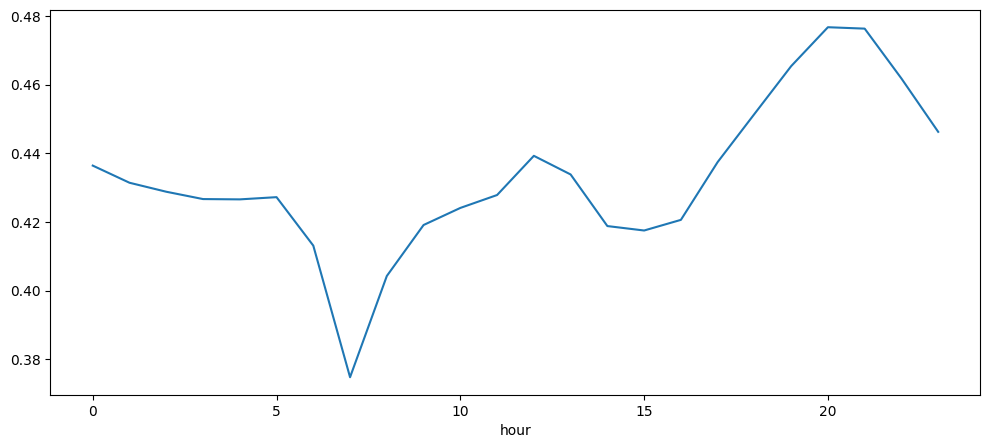

In [85]:
df.groupby("hour")["available_to_total_ratio"].mean().plot(kind="line", figsize=(12,5))

In [86]:
station_id = 1
day = "2025-11-17"

# --- Filter ---
subset = df[
    (df["number"] == station_id) &
    (df["timestamp"].dt.date == pd.to_datetime(day).date())
].sort_values("timestamp")

subset.head()

number  available  free  total           updated_at  \
48500       1          0    25     25  2025-11-17 00:02:00   
48600       1          0    25     25  2025-11-17 00:12:00   
48700       1          0    25     25  2025-11-17 00:22:00   
48800       1          0    25     25  2025-11-17 00:32:00   
48900       1          0    25     25  2025-11-17 00:42:00   

                                            address  geo_point_2d.lon  \
48500  C/GUILLEM DE CASTRO esquina con C/NA JORDANA         -0.382929   
48600  C/GUILLEM DE CASTRO esquina con C/NA JORDANA         -0.382929   
48700  C/GUILLEM DE CASTRO esquina con C/NA JORDANA         -0.382929   
48800  C/GUILLEM DE CASTRO esquina con C/NA JORDANA         -0.382929   
48900  C/GUILLEM DE CASTRO esquina con C/NA JORDANA         -0.382929   

       geo_point_2d.lat  weekday  is_weekend  available_to_total_ratio  \
48500         39.480042        0       False                       0.0   
48600         39.480042        0       False                       0.0   
48700         39.480042        0       False                       0.0   
48800         39.480042        0       False                       0.0   
48900         39.480042        0       False                       0.0   

           time           timestamp  hour  day        date  
48500  00:02:00 2025-11-17 00:02:00     0   17  2025-11-17  
48600  00:12:00 2025-11-17 00:12:00     0   17  2025-11-17  
48700  00:22:00 2025-11-17 00:22:00     0   17  2025-11-17  
48800  00:32:00 2025-11-17 00:32:00     0   17  2025-11-17  
48900  00:42:00 2025-11-17 00:42:00     0   17  2025-11-17

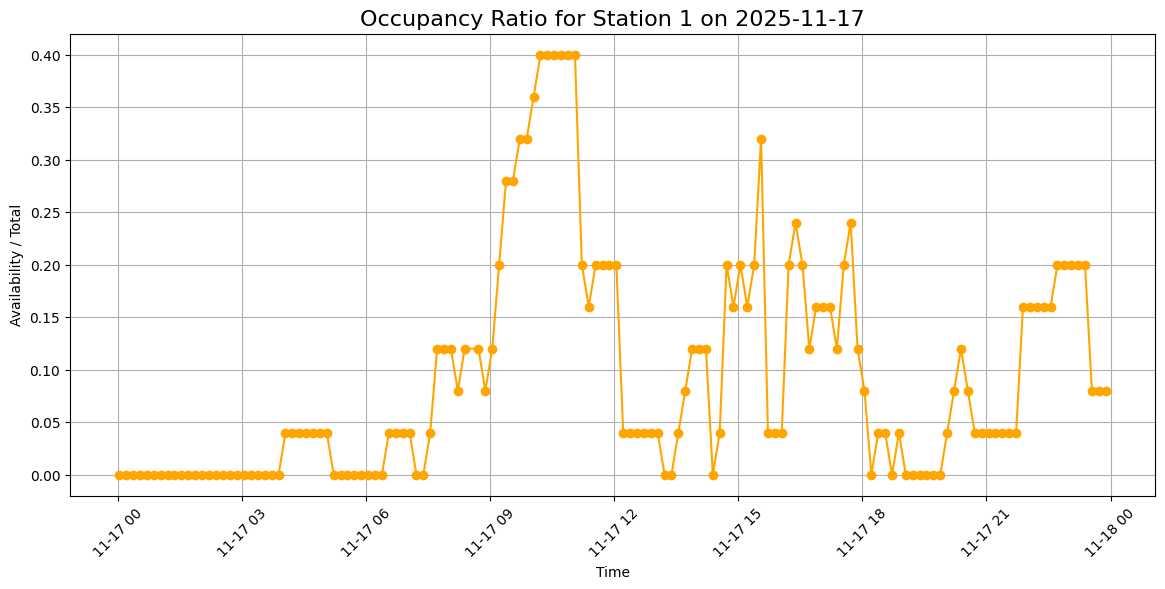

In [87]:
plt.figure(figsize=(14,6))
plt.plot(subset["timestamp"], subset["available_to_total_ratio"], marker="o", color="orange")
plt.title(f"Occupancy Ratio for Station {station_id} on {day}", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Availability / Total")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Some general observations

<Axes: >

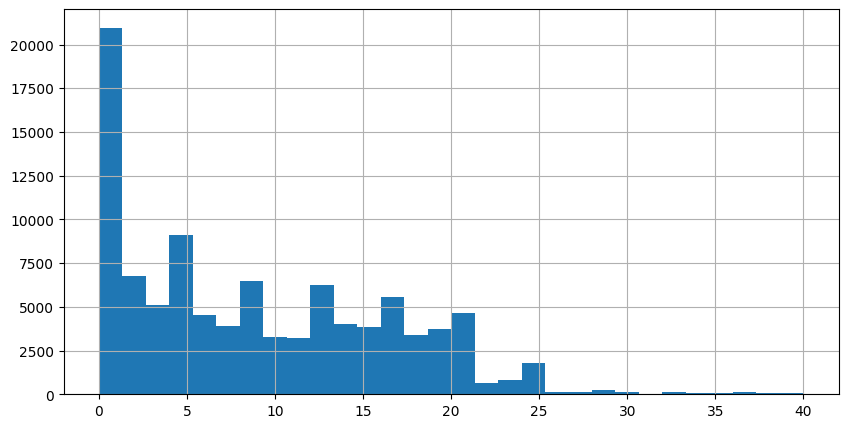

In [88]:
df["available"].hist(bins=30, figsize=(10,5))

<Axes: >

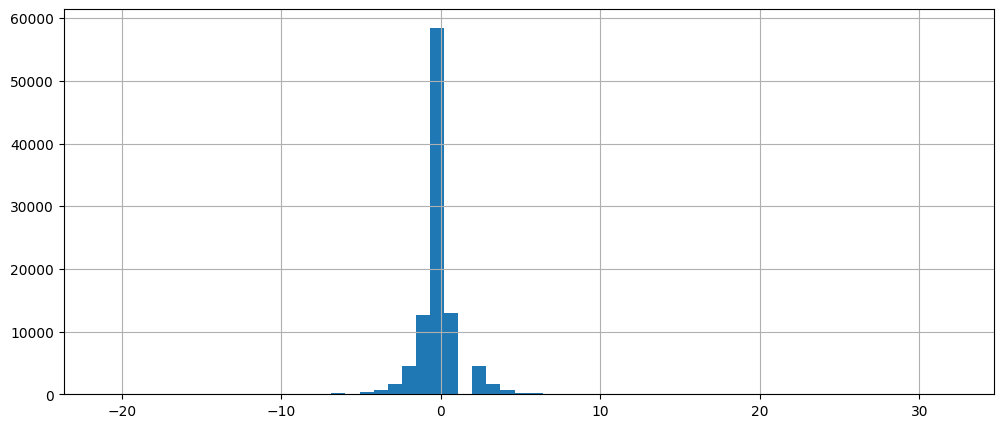

In [89]:
df = df.sort_values("timestamp")
df["delta"] = df.groupby("number")["available"].diff()
df["delta"].hist(bins=60, figsize=(12,5))

<Axes: xlabel='hour'>

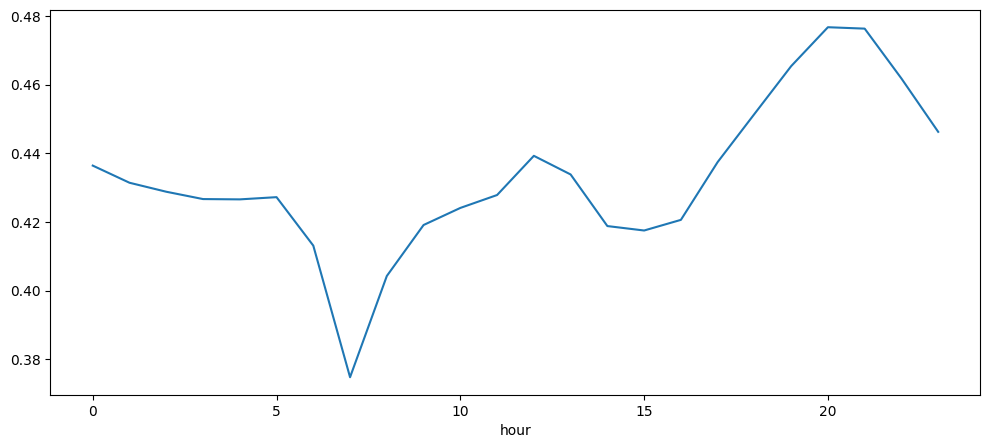

In [90]:
df.groupby("hour")["available_to_total_ratio"].mean().plot(figsize=(12,5))

<Axes: xlabel='hour'>

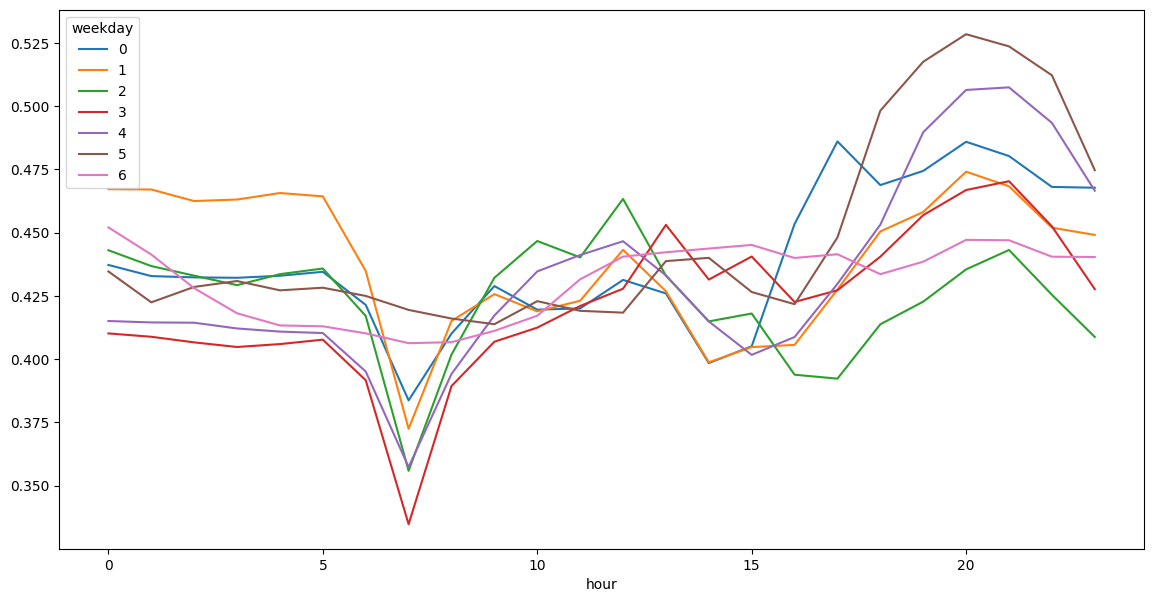

In [91]:
df.groupby(["weekday","hour"])["available_to_total_ratio"].mean().unstack(0).plot(figsize=(14,7))

we can see that the sudden drop in avaliable bikes drops arounf 7am everyone takes the bike to go to work or to school - what we can try to find out is from which regions do people commute to which regions

<Axes: xlabel='hour'>

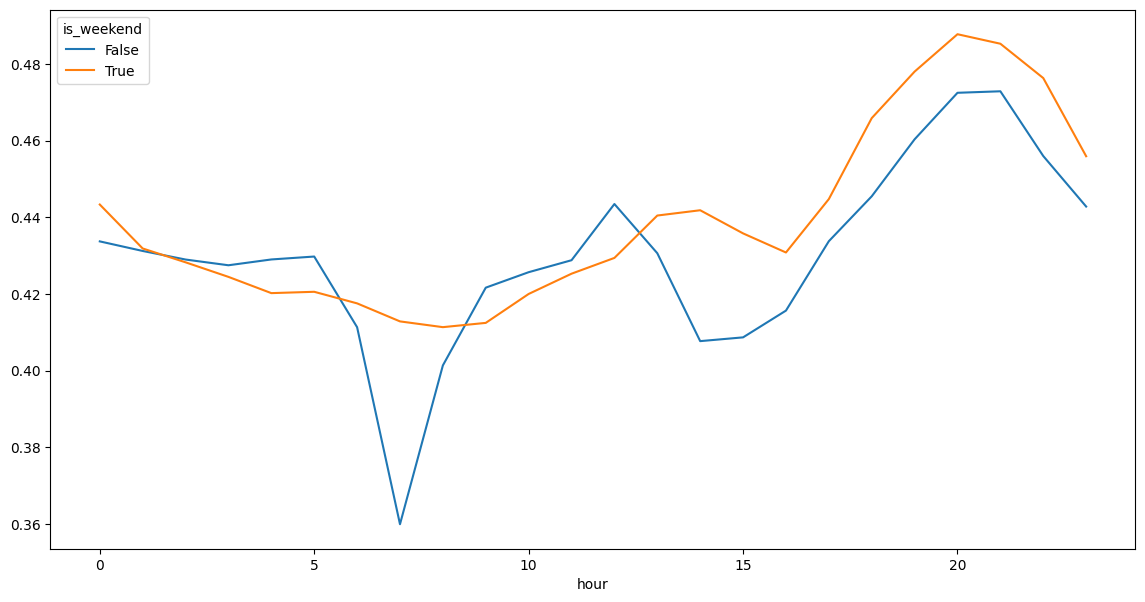

In [92]:
df.groupby(["is_weekend","hour"])["available_to_total_ratio"].mean().unstack(0).plot(figsize=(14,7))

<Axes: xlabel='hour'>

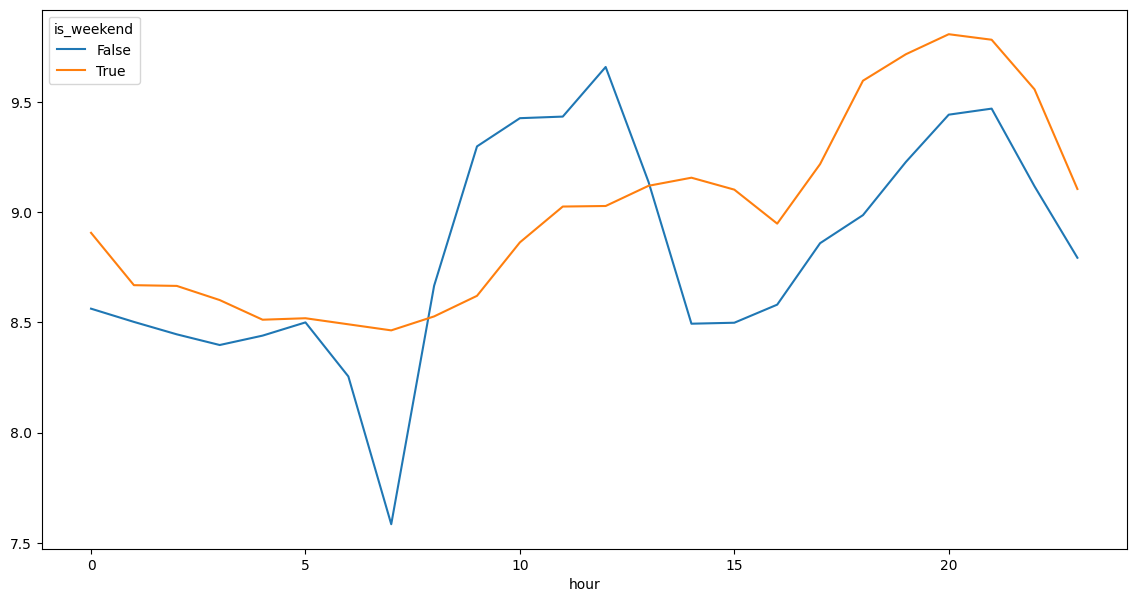

In [93]:
df.groupby(["is_weekend","hour"])["available"].mean().unstack(0).plot(figsize=(14,7))

## Deep dive into 'morning rush'

We compute how many bikes each station loses or gains by calculating the difference in availability between consecutive timestamps. We sum these changes during 7–10 AM to get one value per station: negative values mean bikes were taken, positive values mean bikes were returned. We then plot all stations on one map, coloring departures in red and arrivals in green, and we size each point according to the absolute number of bikes that moved.


In [94]:
import pandas as pd
import plotly.express as px

# ------------------------------------------------------------
# PREPARE DATA
# ------------------------------------------------------------
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values(["number", "timestamp"])

# Compute delta per station
df["delta"] = df.groupby("number")["available"].diff()

# Extract hour
df["hour"] = df["timestamp"].dt.hour


# ============================================================
# 1) WEEKDAY MORNING FLOW
# ============================================================
weekday_df = df[df["is_weekend"] == False]

weekday_morning = weekday_df[weekday_df["hour"].between(7, 10)]
weekday_flow = weekday_morning.groupby("number")["delta"].sum().reset_index()

coords = df[["number","geo_point_2d.lat","geo_point_2d.lon"]].drop_duplicates()
weekday_flow = weekday_flow.merge(coords, on="number")

weekday_flow["flow_type"] = weekday_flow["delta"].apply(lambda x: "departure" if x < 0 else "arrival")
weekday_flow["magnitude"] = weekday_flow["delta"].abs()

fig1 = px.scatter_mapbox(
    weekday_flow,
    lat="geo_point_2d.lat",
    lon="geo_point_2d.lon",
    color="flow_type",
    size="magnitude",
    zoom=12,
    mapbox_style="carto-positron",
    color_discrete_map={"departure": "red", "arrival": "green"},
    title="WEEKDAY Morning Flow (7–10 AM)<br>Red = Stations Losing Bikes | Green = Stations Gaining Bikes"
)
fig1.show()


# ============================================================
# 2) WEEKEND MORNING FLOW
# ============================================================
weekend_df = df[df["is_weekend"] == True]

weekend_morning = weekend_df[weekend_df["hour"].between(7, 10)]
weekend_flow = weekend_morning.groupby("number")["delta"].sum().reset_index()

weekend_flow = weekend_flow.merge(coords, on="number")

weekend_flow["flow_type"] = weekend_flow["delta"].apply(lambda x: "departure" if x < 0 else "arrival")
weekend_flow["magnitude"] = weekend_flow["delta"].abs()

fig2 = px.scatter_mapbox(
    weekend_flow,
    lat="geo_point_2d.lat",
    lon="geo_point_2d.lon",
    color="flow_type",
    size="magnitude",
    zoom=12,
    mapbox_style="carto-positron",
    color_discrete_map={"departure": "red", "arrival": "green"},
    title="WEEKEND Morning Flow (7–10 AM)<br>Red = Stations Losing Bikes | Green = Stations Gaining Bikes"
)
fig2.show()


In [95]:
import plotly.express as px

df_station_avg = df.groupby(
    ["number", "geo_point_2d.lat", "geo_point_2d.lon"]
)["available_to_total_ratio"].mean().reset_index()

fig = px.scatter_mapbox(
    df_station_avg,
    lat="geo_point_2d.lat",
    lon="geo_point_2d.lon",
    color="available_to_total_ratio",  # average over week
    size_max=10,
    zoom=12,
    mapbox_style="carto-positron",
    hover_name="number",
)
fig.show()


In [96]:
df_station_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number                    100 non-null    int64  
 1   geo_point_2d.lat          100 non-null    float64
 2   geo_point_2d.lon          100 non-null    float64
 3   available_to_total_ratio  100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB


In [97]:
df_hourly = df.copy()
df_hourly["hour"] = df_hourly["timestamp"].dt.floor("h")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99100 entries, 0 to 99099
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number                    99100 non-null  int64         
 1   available                 99100 non-null  int64         
 2   free                      99100 non-null  int64         
 3   total                     99100 non-null  int64         
 4   updated_at                99100 non-null  object        
 5   address                   99100 non-null  object        
 6   geo_point_2d.lon          99100 non-null  float64       
 7   geo_point_2d.lat          99100 non-null  float64       
 8   weekday                   99100 non-null  int32         
 9   is_weekend                99100 non-null  bool          
 10  available_to_total_ratio  99100 non-null  float64       
 11  time                      99100 non-null  object        
 12  timestamp              

In [98]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_hourly,
    lat="geo_point_2d.lat",
    lon="geo_point_2d.lon",
    color="available_to_total_ratio",
    animation_frame="hour",          # or "time_rounded"
    zoom=12,
    mapbox_style="carto-positron",
    size_max=10
)

fig.show()


In [99]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_hourly,
    lat="geo_point_2d.lat",
    lon="geo_point_2d.lon",
    color="free",
    animation_frame="hour",          # or "time_rounded"
    zoom=12,
    mapbox_style="carto-positron",
    size_max=10
)

fig.show()

There is not much we can see based on those maps - what we can try to see on the map is what we did for the 'morning rush' hours

In [100]:
import pandas as pd
import plotly.express as px

# ------------------------------------------------------------
# 1. PREPARE DATA (timestamp, sorting, delta)
# ------------------------------------------------------------
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values(["number", "timestamp"])

# delta per timestamp per station
df["delta"] = df.groupby("number")["available"].diff()

# extract hour (0–23)
df["hour"] = df["timestamp"].dt.hour

# ------------------------------------------------------------
# 2. AVERAGE HOURLY FLOW (mean across all days)
# ------------------------------------------------------------
hourly_avg_flow = (
    df.groupby(["number", "hour"])["delta"]
      .mean()                        # <--- average movement per hour across whole week
      .reset_index()
)

# merge coordinates
coords = df[["number", "geo_point_2d.lat", "geo_point_2d.lon"]].drop_duplicates()
hourly_avg_flow = hourly_avg_flow.merge(coords, on="number")

# classify stations
hourly_avg_flow["flow_type"] = hourly_avg_flow["delta"].apply(
    lambda x: "departure" if x < 0 else "arrival"
)

# size = absolute movement
hourly_avg_flow["magnitude"] = hourly_avg_flow["delta"].abs()

# ------------------------------------------------------------
# 3. ANIMATED MAP OF AVERAGE HOURLY FLOW (0–23)
# ------------------------------------------------------------
fig = px.scatter_mapbox(
    hourly_avg_flow,
    lat="geo_point_2d.lat",
    lon="geo_point_2d.lon",
    animation_frame="hour",         # <--- hour slider
    color="flow_type",              # red vs green
    size="magnitude",               # movement strength
    zoom=12,
    mapbox_style="carto-positron",
    color_discrete_map={
        "departure": "red",
        "arrival": "green"
    },
    title="Average Hourly Valenbisi Flow (Across the Entire Week)<br>"
          "Red = Stations Losing Bikes | Green = Stations Gaining Bikes"
)

fig.show()


## Clustering


### Elbow method

In [101]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour

pivot = df.pivot_table(
    values="available_to_total_ratio",
    index="number",
    columns="hour",
    aggfunc="mean"
)

pivot = pivot.fillna(pivot.mean(axis=1))

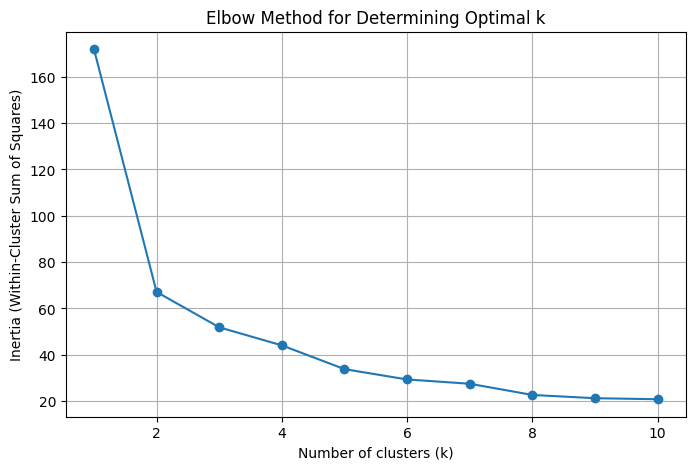

In [102]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot.iloc[:, :24])   # use the 24 hourly features only
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Determining Optimal k")
plt.grid(True)
plt.show()


The “elbow” is at 3, because that is where the slope visibly changes from steep to moderate.

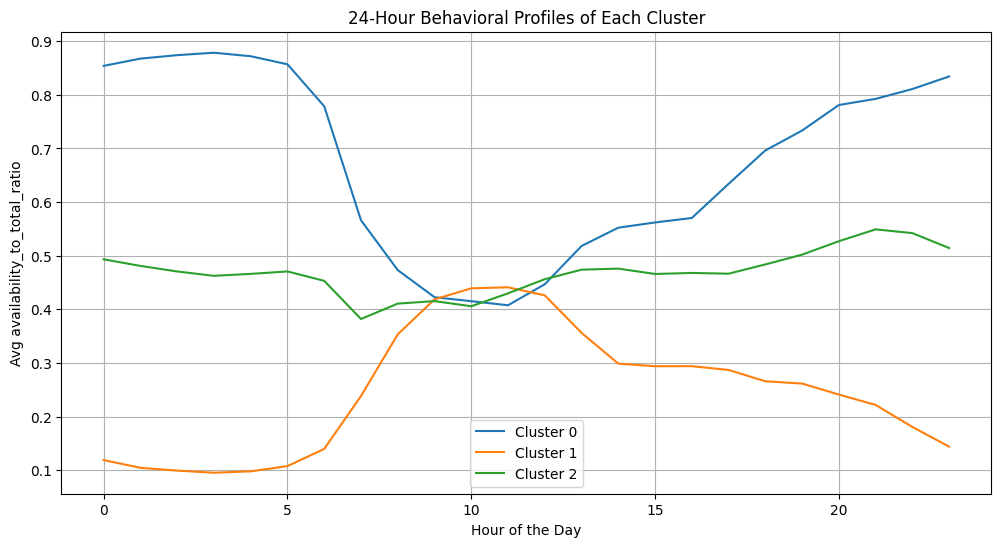

In [103]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
pivot["cluster"] = kmeans.fit_predict(pivot)

coords = df[["number","geo_point_2d.lat","geo_point_2d.lon"]].drop_duplicates()
clusters_map = pivot.merge(coords, on="number")

fig = px.scatter_mapbox(
    clusters_map,
    lat="geo_point_2d.lat",
    lon="geo_point_2d.lon",
    color="cluster",
    zoom=12,
    mapbox_style="carto-positron",
    title="Station Clusters Based on 24-Hour Availability Ratio Patterns"
)
fig.show()

plt.figure(figsize=(12,6))

for c in range(k):
    cluster_avg = pivot[pivot["cluster"] == c].iloc[:, :-1].mean()
    plt.plot(cluster_avg.index, cluster_avg.values, label=f"Cluster {c}")

plt.xlabel("Hour of the Day")
plt.ylabel("Avg availability_to_total_ratio")
plt.title("24-Hour Behavioral Profiles of Each Cluster")
plt.legend()
plt.grid(True)
plt.show()
